DATASET: https://www.kaggle.com/datasets/sajidsaifi/prostate-cancer

# BUSSINESS UNDERSTANDING

Kanker prostat adalah kanker di dalam kelenjar prostat. Kondisi ini umumnya ditandai dengan gangguan buang air kecil. Pada sebagian besar kasus, kanker prostat menyerang pria usia di atas 50 tahun.

Kanker sendiri terbagi menjadi 2 jenis yaitu kanker jinak (Benign) dan kanker ganas (Malignant). Untuk mempermudah proses penentuan pasien menderita kanker jinak atau ganas, perlu dibuatkan model yang membantu dalam mengklasifikasi maupun memprediksi jenis kanker yang di derita.

Berdasarkan dari apa yang sudah dijelaskan sebelumnya, model ini dibuat menggunakan metode klasifikasi dengan algoritma Support Vector Machine (SVM) dengan inputan:

1. Radius

2. Tekstur

3. Perimeter

4. Area

5. Kehalusan

6. Kepadatan

Dan mengeluarkan output Pasien menderita kanker prostat jinak (Benign) dan Pasien menderita kanker prostat ganas (Malignant)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cancer_data = pd.read_csv('Cancer_Data.csv')

# DATA UNDERSTANDING

diagnosis_result : Hasil Diagnosis (B = Terkena Kanker dan M = Tidak Terkena Kanker)

radius : Radius karakteristik visual kanker

texture : Tekstur karakteristik visual kanker

perimeter : Keliling karakteristik visual kanker

area : Luas karakteristik visual kanker

smoothness : Kelembutan karakteristik visual kanker

compactness : Kepadatan karakteristik visual kanker

In [3]:
cancer_data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
cancer_data.shape

(100, 10)

In [5]:
cancer_data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [6]:
cancer_data['diagnosis_result'].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

# DATA PREPROSESSING

In [7]:
columns_to_drop = ['id','symmetry',	'fractal_dimension']
cancer_data = cancer_data.drop(columns=columns_to_drop)

In [8]:
cancer_data.replace(('M', 'B'), (0,1), inplace=True) 

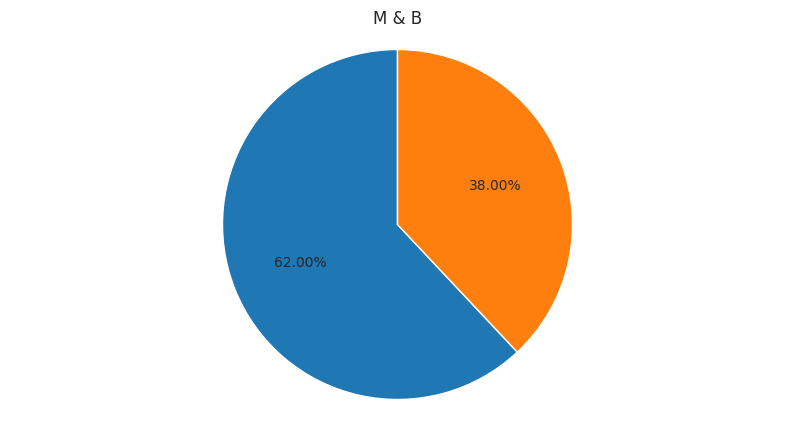

In [9]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.pie(cancer_data['diagnosis_result'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("M & B")
plt.show()

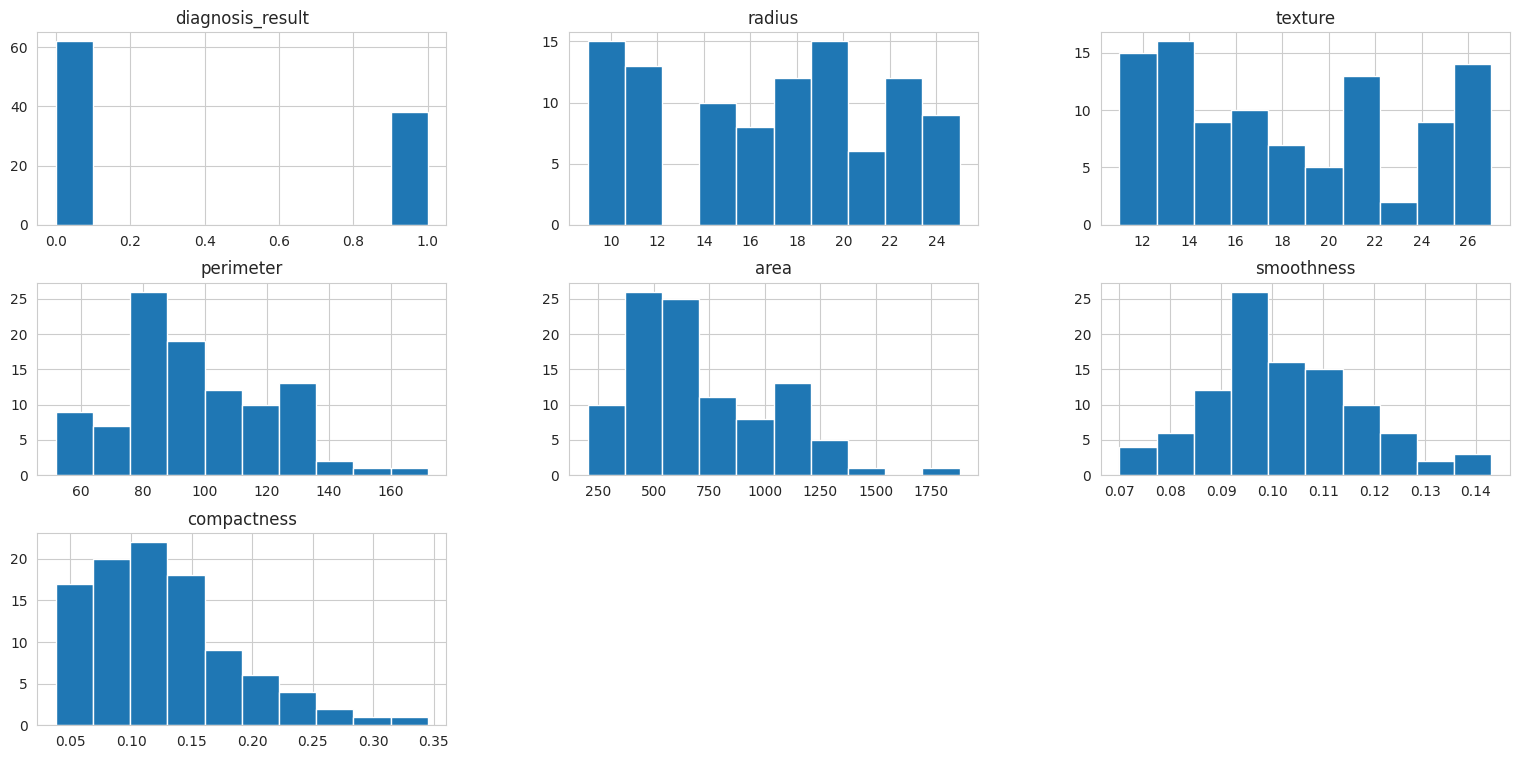

In [10]:
cancer_data.hist(figsize=(19,9));

# MODELLING

In [11]:
X = cancer_data.drop(columns='diagnosis_result', axis=1)
Y = cancer_data['diagnosis_result']

In [12]:
print(X)

    radius  texture  perimeter  area  smoothness  compactness
0       23       12        151   954       0.143        0.278
1        9       13        133  1326       0.143        0.079
2       21       27        130  1203       0.125        0.160
3       14       16         78   386       0.070        0.284
4        9       19        135  1297       0.141        0.133
..     ...      ...        ...   ...         ...          ...
95      23       16        132  1264       0.091        0.131
96      22       14         78   451       0.105        0.071
97      19       27         62   295       0.102        0.053
98      21       24         74   413       0.090        0.075
99      16       27         94   643       0.098        0.114

[100 rows x 6 columns]


In [13]:
print(Y)

0     0
1     1
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Name: diagnosis_result, Length: 100, dtype: int64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(100, 6) (80, 6) (20, 6)


In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.8625


In [20]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
print("Akurasi data testing : ", testing_data_accuracy)

Akurasi data testing :  0.85


In [22]:
cancer_data[cancer_data['diagnosis_result'] == 0].head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness
0,0,23,12,151,954,0.143,0.278
2,0,21,27,130,1203,0.125,0.160
3,0,14,16,78,386,0.070,0.284
4,0,9,19,135,1297,0.141,0.133
6,0,16,26,120,1040,0.095,0.109


# EVALUATION

In [23]:
input_data = (23,12,151,954,0.143,0.278) # 0

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Pasien Terkena Kanker Prostat Jinak')
else :
    print('Pasien Terkena Kanker Prostat Ganas')

[0]
Pasien Terkena Kanker Prostat Jinak


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

In [24]:
import pickle

In [25]:
filename = 'cancer_model_regression.sav'
pickle.dump(model, open(filename, 'wb'))